# Do it! 쉽게 배우는 파이썬 데이터 분석 - 4장

## 04-2 데이터 프레임 만들기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import pandas_profiling

In [ ]:
df = pd.DataFrame({
    'name': ['김지훈', '이유진', '박동현', '김민지'],
    'english': [90, 80, 60, 70],
    'math': [50, 60, 100, 20],
})
df

,name,english,math
0,김지훈,90,50
1,이유진,80,60
2,박동현,60,100
3,김민지,70,20


In [ ]:
df.describe()

,english,math
count,4.000000,4.000000
mean,75.000000,57.500000
std,12.909944,33.040379
min,60.000000,20.000000
25%,67.500000,42.500000
50%,75.000000,55.000000
75%,82.500000,70.000000
max,90.000000,100.000000


In [ ]:
df = pd.DataFrame({
    '제품': ['사과', '딸기', '수박'],
    '가격': [1800, 1500, 3000],
    '판매량': [24, 38, 13],
})
df

,제품,가격,판매량
0,사과,1800,24
1,딸기,1500,38
2,수박,3000,13


In [ ]:
mean_df = df.describe().loc[['mean']]
mean_df.rename(index={'mean':'과일'}, inplace=True)
mean_df.rename(columns={'가격':'가격 평균','판매량':'판매량 평균'}, inplace=True)
mean_df

,가격 평균,판매량 평균
과일,2100.0,25.0


## 04-3 외부 데이터 이용하기

In [ ]:
df_exam = pd.read_excel('excel_exam.xlsx')
df_exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
df_exam.describe().loc[['mean']]

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45


In [ ]:
df_exam_novar = pd.read_excel('excel_exam_novar.xlsx', header=None)
df_exam_novar

,0,1,2,3,4
0,1,1,50,98,50
1,2,1,60,97,60
2,3,2,25,80,65
3,4,2,50,89,98
4,5,3,20,98,15
5,6,3,50,98,45
6,7,4,46,98,65
7,8,4,48,87,12


In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/youngwoos/Doit_Python/main/Data/exam.csv','exam.csv')

('exam.csv', <http.client.HTTPMessage at 0x289ff1a90>)

In [ ]:
df_csv_exam = pd.read_csv('exam.csv')
df_csv_exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [ ]:
df_midterm = pd.DataFrame({
    'english': [90, 80, 60, 70],
    'math': [50, 60, 100, 20],
    'nclass': [1, 1, 2, 2],
})
df_midterm.to_csv('output_newdata.csv', index=False)

# Do it! 쉽게 배우는 파이썬 데이터 분석 - 5장

## 05-1 데이터 파악하기

In [ ]:
exam = pd.read_csv('exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [ ]:
exam.tail()

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [ ]:
exam.shape

(20, 5)

In [ ]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 928.0 bytes


In [ ]:
exam.describe()

,id,nclass,math,english,science
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,3.000000,57.450000,84.900000,59.450000
std,5.91608,1.450953,20.299015,12.875517,25.292968
min,1.00000,1.000000,20.000000,56.000000,12.000000
25%,5.75000,2.000000,45.750000,78.000000,45.000000
50%,10.50000,3.000000,54.000000,86.500000,62.500000
75%,15.25000,4.000000,75.750000,98.000000,78.000000
max,20.00000,5.000000,90.000000,98.000000,98.000000


In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv','mpg.csv')

('mpg.csv', <http.client.HTTPMessage at 0x14046a7c0>)

In [ ]:
mpg = pd.read_csv('mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
mpg.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
count,234,234,234.000000,234.000000,234.000000,234,234,234.000000,234.000000,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.471795,2003.500000,5.888889,NaN,NaN,16.858974,23.440171,NaN,NaN
std,NaN,NaN,1.291959,4.509646,1.611534,NaN,NaN,4.255946,5.954643,NaN,NaN
min,NaN,NaN,1.600000,1999.000000,4.000000,NaN,NaN,9.000000,12.000000,NaN,NaN
25%,NaN,NaN,2.400000,1999.000000,4.000000,NaN,NaN,14.000000,18.000000,NaN,NaN
50%,NaN,NaN,3.300000,2003.500000,6.000000,NaN,NaN,17.000000,24.000000,NaN,NaN
75%,NaN,NaN,4.600000,2008.000000,8.000000,NaN,NaN,19.000000,27.000000,NaN,NaN


## 05-2 변수명 바꾸기

In [ ]:
df_raw = pd.DataFrame({
    'var1': [1, 2, 1],
    'var2': [2, 3, 2],
})
df_raw

,var1,var2
0,1,2
1,2,3
2,1,2


In [ ]:
df_new = df_raw.copy()
df_new.rename(columns={'var2':'v2'}, inplace=True)
df_new

,var1,v2
0,1,2
1,2,3
2,1,2


In [ ]:
mpg = pd.read_csv('mpg.csv')
mpg_new = mpg.copy()
mpg_new.rename(columns={'cty':'city','hwy':'highway'}, inplace=True)
mpg_new

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## 05-3 파생변수 만들기

In [ ]:
df = pd.DataFrame({
    'var1': [4, 3, 8],
    'var2': [2, 6, 1],
})
df

,var1,var2
0,4,2
1,3,6
2,8,1


In [ ]:
df['var_sum'] = df['var1'] + df['var2']
df

,var1,var2,var_sum
0,4,2,6
1,3,6,9
2,8,1,9


In [ ]:
df['var_mean'] = (df['var1'] + df['var2']) / 2
df

,var1,var2,var_sum,var_mean
0,4,2,6,3.0
1,3,6,9,4.5
2,8,1,9,4.5


In [ ]:
mpg['total'] = (mpg['cty'] + mpg['hwy']) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [ ]:
mpg['total'].describe()

count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

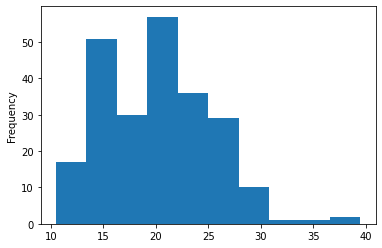

In [ ]:
mpg['total'].plot.hist()

In [ ]:
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass


In [ ]:
mpg['test'].value_counts()

pass    128
fail    106
Name: test, dtype: int64

<AxesSubplot:>

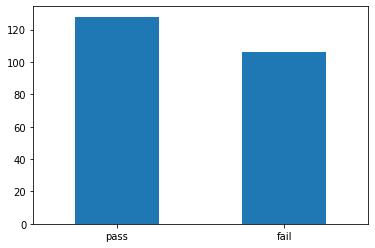

In [ ]:
count_test = mpg['test'].value_counts()
count_test.plot.bar(rot=0)

In [ ]:
mpg['grade'] = np.where(mpg['total'] >= 30, 'A',
                np.where(mpg['total'] >= 20, 'B', 'C'))
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total,test,grade
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B


In [ ]:
count_test = mpg['grade'].value_counts().sort_index()
count_test

A     10
B    118
C    106
Name: grade, dtype: int64

<AxesSubplot:>

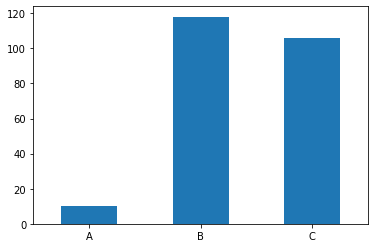

In [ ]:
count_test.plot.bar(rot=0)

In [ ]:
# mpg['size'] = np.where((mpg['class']=='compact') |
#                         (mpg['class']=='subcompact') |
#                         (mpg['class']=='2seater'),
#                         'small', 'large')
mpg['size'] = np.where(mpg['class'].isin(['compact','subcompact','2seater']), 'small', 'large')
mpg['size'].value_counts()

large    147
small     87
Name: size, dtype: int64

## 분석 도전

In [ ]:
urllib.request.urlretrieve('https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/midwest.csv','midwest.csv')

('midwest.csv', <http.client.HTTPMessage at 0x168a670a0>)

In [ ]:
midwest = pd.read_csv('midwest.csv')
print(midwest.shape)
midwest.head()

(437, 28)


,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


#### 문제 1. `midwest.csv`를 불러와 데이터의 특징을 파악하세요.

In [ ]:
print(midwest.columns)

Index(['PID', 'county', 'state', 'area', 'poptotal', 'popdensity', 'popwhite',
       'popblack', 'popamerindian', 'popasian', 'popother', 'percwhite',
       'percblack', 'percamerindan', 'percasian', 'percother', 'popadults',
       'perchsd', 'percollege', 'percprof', 'poppovertyknown',
       'percpovertyknown', 'percbelowpoverty', 'percchildbelowpovert',
       'percadultpoverty', 'percelderlypoverty', 'inmetro', 'category'],
      dtype='object')


In [ ]:
midwest.isna().sum()

PID                     0
county                  0
state                   0
area                    0
poptotal                0
popdensity              0
popwhite                0
popblack                0
popamerindian           0
popasian                0
popother                0
percwhite               0
percblack               0
percamerindan           0
percasian               0
percother               0
popadults               0
perchsd                 0
percollege              0
percprof                0
poppovertyknown         0
percpovertyknown        0
percbelowpoverty        0
percchildbelowpovert    0
percadultpoverty        0
percelderlypoverty      0
inmetro                 0
category                0
dtype: int64

In [ ]:
pr = midwest.profile_report()
pr.to_file('midwest_report.html')

#### 문제 2. `poptotal`(전체 인구) 변수를 `total`로, `popasian`(아시아 인구) 변수를 `asian`으로 수정하세요.

In [ ]:
midwest.rename(columns={'poptotal':'total','popasian':'asian'}, inplace=True)
midwest.head()

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


#### 문제 3. `total`, `asian` 변수를 이용해 '전체 인구 대비 아시아 인구 백분율' 파생변수를 추가하고, 히스토그램을 만들어 분포를 살펴보세요.

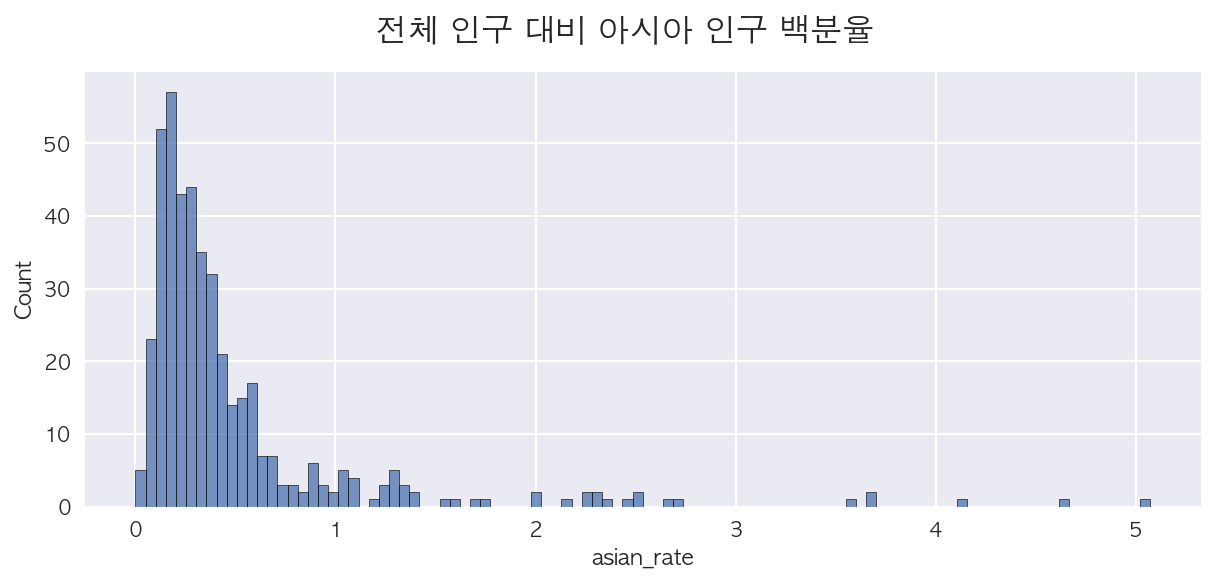

In [ ]:
midwest['asian_rate'] = midwest['asian']/midwest['total']*100
plt.figure(figsize=(10,4))
sns.histplot(data=midwest, x='asian_rate', bins=100)
plt.suptitle('전체 인구 대비 아시아 인구 백분율', fontsize=16)
plt.show()

#### 문제 4. 아시아 인구 백분율 전체 평균을 구하고, 평균을 초과하면 `'large'`, 그 외에는 `'small'`을 부여한 파생변수를 만들어보세요.

In [ ]:
asian_rate_mean = midwest['asian_rate'].mean()
print('아시아 인구 백분율 전체 평균:', round(asian_rate_mean, 5))
midwest['asian_rate_size'] = np.where(midwest['asian_rate']>asian_rate_mean,'large','small')

아시아 인구 백분율 전체 평균: 0.48725


#### 문제 5. `'large'`와 `'small'`에 해당하는 지역이 얼마나 많은지 빈도표와 빈도 막대 그래프를 만들어 확인해 보세요.

small    318
large    119
Name: asian_rate_size, dtype: int64


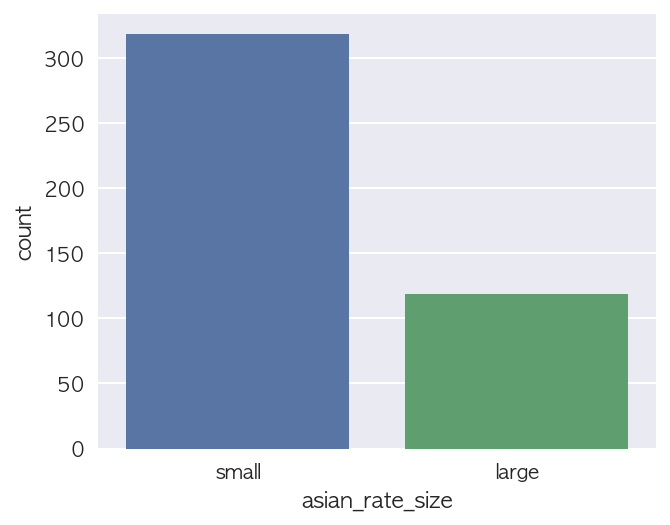

In [ ]:
print(midwest['asian_rate_size'].value_counts())
plt.figure(figsize=(5,4))
sns.countplot(data=midwest, x='asian_rate_size')
plt.show()